### Prepare data and visualization for windspeed

In [111]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore

In [112]:
TIMEZONE = 'Asia/Ho_Chi_Minh' # "UTC"

In [113]:
# LOAD FROM CSV TO PANDAS
real_power_df = pd.read_csv('real-data/real_power.csv')

# SHOW DATA
real_power_df

PCTimeStamp     P_HD1     P_HD2     P_HD3     P_HD4  \
0      2024-04-01 0:00:00+07:00  0.313143  0.066780  0.377192  0.169806   
1      2024-04-01 0:10:00+07:00  0.156584  0.000000  0.079758  0.000000   
2      2024-04-01 0:20:00+07:00  0.221754  0.000000  0.000000  0.000000   
3      2024-04-01 0:30:00+07:00  0.194029  0.101187  0.041689  0.066218   
4      2024-04-01 0:40:00+07:00  0.180122  0.222591  0.000000  0.146788   
...                         ...       ...       ...       ...       ...   
3019  2024-04-21 23:10:00+07:00  0.924727  0.654799  0.440236  0.598131   
3020  2024-04-21 23:20:00+07:00  0.682504  0.565777  0.253166  0.496935   
3021  2024-04-21 23:30:00+07:00  0.508107  0.474653  0.290826  0.386944   
3022  2024-04-21 23:40:00+07:00  0.479630  0.463855  0.432202  0.390315   
3023  2024-04-21 23:50:00+07:00  0.604066  0.668565  0.264891  0.615668   

         P_HD5     P_HD6     P_HD7     P_HD8  
0     0.339420  0.193235  0.141798  0.141798  
1     0.081981  0.099291  0.000000  0.000000  
2     0.000000  0.000000  0.000000  0.000000  
3     0.000000  0.000000  0.000000  0.000000  
4     0.000000  0.089672  0.078579  0.078579  
...        ...       ...       ...       ...  
3019  0.423949  0.416065  0.367564  0.367564  
3020  0.281409  0.281409  0.354829  0.354829  
3021  0.322041  0.247964  0.343373  0.343373  
3022  0.331064  0.361304  0.445933  0.445933  
3023  0.361304  0.358060  0.400232  0.400232  

[3024 rows x 9 columns]

In [114]:
real_power_df.columns

Index(['PCTimeStamp', 'P_HD1', 'P_HD2', 'P_HD3', 'P_HD4', 'P_HD5', 'P_HD6',
       'P_HD7', 'P_HD8'],
      dtype='object')

In [115]:
# PREPROCESS: CONVERT DATETIME TYPE, TIMEZONE, NUMERIC TYPE

# Convert to PCTimeStamp field to datetime type
real_power_df['PCTimeStamp'] = pd.to_datetime(real_power_df['PCTimeStamp'])

# Convert from Local Timezone to UTC+7 (Asia Ho Chi Minh)
real_power_df['PCTimeStamp'] = real_power_df['PCTimeStamp'].dt.tz_convert(TIMEZONE)

# Extract date from timestamp
real_power_df['Date'] = real_power_df['PCTimeStamp'].dt.date
real_power_df['Date'] = pd.to_datetime(real_power_df['Date']).dt.date
# real_power_df['Date'] = pd.to_datetime(real_power_df['Date'])

real_power_df['Date'] = real_power_df['Date'].astype(str)


# Convert some columns to numeric type
numeric_columns = ['P_HD1', 'P_HD2', 'P_HD3', 'P_HD4', 'P_HD5', 'P_HD6', 'P_HD7', 'P_HD8']
real_power_df[numeric_columns] = real_power_df[numeric_columns].apply(pd.to_numeric, errors='coerce', axis=1)

In [116]:
real_power_df.dtypes

PCTimeStamp    datetime64[ns, Asia/Ho_Chi_Minh]
P_HD1                                   float64
P_HD2                                   float64
P_HD3                                   float64
P_HD4                                   float64
P_HD5                                   float64
P_HD6                                   float64
P_HD7                                   float64
P_HD8                                   float64
Date                                     object
dtype: object

In [117]:
real_power_df["Date"]

0       2024-04-01
1       2024-04-01
2       2024-04-01
3       2024-04-01
4       2024-04-01
           ...    
3019    2024-04-21
3020    2024-04-21
3021    2024-04-21
3022    2024-04-21
3023    2024-04-21
Name: Date, Length: 3024, dtype: object

In [131]:
# # Group by date and calculate sum for each group
# sum_by_date = real_power_df.groupby('Date').sum()
# sum_by_date


# # Performing operations on each group
# for group_name, group_df in real_power_df.groupby('Date'):
#     print(f"Group: {group_name}")
#     # print(group_df)
#     print(group_df[numeric_columns].sum())
#     print()

# group_by_date = real_power_df.groupby('Date')
# group_by_date

real_power_df.groupby('Date')[numeric_columns].sum()

P_HD1      P_HD2     P_HD3      P_HD4      P_HD5     P_HD6  \
Date                                                                         
2024-04-01  47.001835  22.342103  18.09247  26.940215  21.513565  22.03901   
2024-04-02  47.001835  22.342103  18.09247  26.940215  21.513565  22.03901   
2024-04-03  47.001835  22.342103  18.09247  26.940215  21.513565  22.03901   
2024-04-04  47.001835  22.342103  18.09247  26.940215  21.513565  22.03901   
2024-04-05  47.001835  22.342103  18.09247  26.940215  21.513565  22.03901   
2024-04-06  47.001835  22.342103  18.09247  26.940215  21.513565  22.03901   
2024-04-07  47.001835  22.342103  18.09247  26.940215  21.513565  22.03901   
2024-04-08  47.001835  22.342103  18.09247  26.940215  21.513565  22.03901   
2024-04-09  47.001835  22.342103  18.09247  26.940215  21.513565  22.03901   
2024-04-10  47.001835  22.342103  18.09247  26.940215  21.513565  22.03901   
2024-04-11  47.001835  22.342103  18.09247  26.940215  21.513565  22.03901   
2024-04-12  47.001835  22.342103  18.09247  26.940215  21.513565  22.03901   
2024-04-13  47.001835  22.342103  18.09247  26.940215  21.513565  22.03901   
2024-04-14  47.001835  22.342103  18.09247  26.940215  21.513565  22.03901   
2024-04-15  47.001835  22.342103  18.09247  26.940215  21.513565  22.03901   
2024-04-16  47.001835  22.342103  18.09247  26.940215  21.513565  22.03901   
2024-04-17  47.001835  22.342103  18.09247  26.940215  21.513565  22.03901   
2024-04-18  47.001835  22.342103  18.09247  26.940215  21.513565  22.03901   
2024-04-19  47.001835  22.342103  18.09247  26.940215  21.513565  22.03901   
2024-04-20  47.001835  22.342103  18.09247  26.940215  21.513565  22.03901   
2024-04-21  47.001835  22.342103  18.09247  26.940215  21.513565  22.03901   

                P_HD7      P_HD8  
Date                              
2024-04-01  25.142411  25.142411  
2024-04-02  25.142411  25.142411  
2024-04-03  25.142411  25.142411  
2024-04-04  25.142411  25.142411  
2024-04-05  25.142411  25.142411  
2024-04-06  25.142411  25.142411  
2024-04-07  25.142411  25.142411  
2024-04-08  25.142411  25.142411  
2024-04-09  25.142411  25.142411  
2024-04-10  25.142411  25.142411  
2024-04-11  25.142411  25.142411  
2024-04-12  25.142411  25.142411  
2024-04-13  25.142411  25.142411  
2024-04-14  25.142411  25.142411  
2024-04-15  25.142411  25.142411  
2024-04-16  25.142411  25.142411  
2024-04-17  25.142411  25.142411  
2024-04-18  25.142411  25.142411  
2024-04-19  25.142411  25.142411  
2024-04-20  25.142411  25.142411  
2024-04-21  25.142411  25.142411

In [119]:
import pandas as pd

# Sample DataFrame
data = {
    'Category': ['A', 'B', 'A', 'B', 'A', 'B'],
    'Value': [10, 20, 30, 40, 50, 60]
}

df = pd.DataFrame(data)

# Grouping by the 'Category' column
grouped = df.groupby('Category')

# Performing operations on each group
for group_name, group_df in grouped:
    print(f"Group: {group_name}")
    print(group_df)
    print()

# Performing aggregate operations on groups
sum_by_category = grouped.sum()
print(sum_by_category)

Group: A
  Category  Value
0        A     10
2        A     30
4        A     50

Group: B
  Category  Value
1        B     20
3        B     40
5        B     60

          Value
Category       
A            90
B           120


In [120]:
real_power_df

PCTimeStamp     P_HD1     P_HD2     P_HD3     P_HD4  \
0    2024-04-01 00:00:00+07:00  0.313143  0.066780  0.377192  0.169806   
1    2024-04-01 00:10:00+07:00  0.156584  0.000000  0.079758  0.000000   
2    2024-04-01 00:20:00+07:00  0.221754  0.000000  0.000000  0.000000   
3    2024-04-01 00:30:00+07:00  0.194029  0.101187  0.041689  0.066218   
4    2024-04-01 00:40:00+07:00  0.180122  0.222591  0.000000  0.146788   
...                        ...       ...       ...       ...       ...   
3019 2024-04-21 23:10:00+07:00  0.924727  0.654799  0.440236  0.598131   
3020 2024-04-21 23:20:00+07:00  0.682504  0.565777  0.253166  0.496935   
3021 2024-04-21 23:30:00+07:00  0.508107  0.474653  0.290826  0.386944   
3022 2024-04-21 23:40:00+07:00  0.479630  0.463855  0.432202  0.390315   
3023 2024-04-21 23:50:00+07:00  0.604066  0.668565  0.264891  0.615668   

         P_HD5     P_HD6     P_HD7     P_HD8        Date  
0     0.339420  0.193235  0.141798  0.141798  2024-04-01  
1     0.081981  0.099291  0.000000  0.000000  2024-04-01  
2     0.000000  0.000000  0.000000  0.000000  2024-04-01  
3     0.000000  0.000000  0.000000  0.000000  2024-04-01  
4     0.000000  0.089672  0.078579  0.078579  2024-04-01  
...        ...       ...       ...       ...         ...  
3019  0.423949  0.416065  0.367564  0.367564  2024-04-21  
3020  0.281409  0.281409  0.354829  0.354829  2024-04-21  
3021  0.322041  0.247964  0.343373  0.343373  2024-04-21  
3022  0.331064  0.361304  0.445933  0.445933  2024-04-21  
3023  0.361304  0.358060  0.400232  0.400232  2024-04-21  

[3024 rows x 10 columns]

In [121]:
real_power_df.describe()

P_HD1        P_HD2        P_HD3        P_HD4        P_HD5  \
count  3024.000000  3024.000000  3024.000000  3024.000000  3024.000000   
mean      0.326402     0.155153     0.125642     0.187085     0.149400   
std       0.241602     0.201213     0.144612     0.184829     0.153322   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.128387     0.000000     0.000000     0.037816     0.000000   
50%       0.260265     0.083177     0.075755     0.149223     0.113540   
75%       0.471490     0.243945     0.197335     0.295903     0.259343   
max       1.088198     1.042765     0.724112     0.898624     0.638124   

             P_HD6        P_HD7        P_HD8  
count  3024.000000  3024.000000  3024.000000  
mean      0.153049     0.174600     0.174600  
std       0.148527     0.175669     0.175669  
min       0.000000     0.000000     0.000000  
25%       0.040350     0.000000     0.000000  
50%       0.111978     0.130275     0.130275  
75%       0.241559     0.279020     0.279020  
max       0.722452     0.805974     0.805974

In [122]:
real_power_df.dtypes

PCTimeStamp    datetime64[ns, Asia/Ho_Chi_Minh]
P_HD1                                   float64
P_HD2                                   float64
P_HD3                                   float64
P_HD4                                   float64
P_HD5                                   float64
P_HD6                                   float64
P_HD7                                   float64
P_HD8                                   float64
Date                                     object
dtype: object

In [123]:
real_power_df.sum()

TypeError: 'DatetimeArray' with dtype datetime64[ns, Asia/Ho_Chi_Minh] does not support reduction 'sum'

In [ ]:
# PREPROCESS: CONVERT DATETIME TYPE, TIMEZONE, NUMERIC TYPE

# Convert to PCTimeStamp field to datetime type
real_wind_df['PCTimeStamp'] = pd.to_datetime(real_wind_df['PCTimeStamp'])

# Convert from Local Timezone to UTC+7 (Asia Ho Chi Minh)
real_wind_df['PCTimeStamp'] = real_wind_df['PCTimeStamp'].dt.tz_convert(TIMEZONE)

# Convert some columns to numeric type
numeric_columns = ['HD01_Ambient WindSpeed Avg. (1)', 'HD02_Ambient WindSpeed Avg. (2)', 'HD03_Ambient WindSpeed Avg. (3)', 'HD04_Ambient WindSpeed Avg. (4)', 'HD05_Ambient WindSpeed Avg. (5)', 'HD06_Ambient WindSpeed Avg. (6)', 'HD07_Ambient WindSpeed Avg. (7)', 'HD08_Ambient WindSpeed Avg. (8)']
real_wind_df[numeric_columns] = real_wind_df[numeric_columns].apply(pd.to_numeric, errors='coerce', axis=1)

In [ ]:
# CHECK DATA AFTER PREPROCESSING
real_wind_df.head(5)

PCTimeStamp  HD01_Ambient WindSpeed Avg. (1)  \
0 2024-04-01 00:00:00+07:00                            4.293   
1 2024-04-01 00:10:00+07:00                            3.566   
2 2024-04-01 00:20:00+07:00                            3.898   
3 2024-04-01 00:30:00+07:00                            3.762   
4 2024-04-01 00:40:00+07:00                            3.691   

   HD02_Ambient WindSpeed Avg. (2)  HD03_Ambient WindSpeed Avg. (3)  \
0                            3.012                            4.535   
1                            1.500                            3.102   
2                            1.965                            1.863   
3                            3.242                            2.824   
4                            3.902                            2.176   

   HD04_Ambient WindSpeed Avg. (4)  HD05_Ambient WindSpeed Avg. (5)  \
0                            3.637                            4.395   
1                            2.543                            3.117   
2                            2.402                            2.410   
3                            3.008                            2.254   
4                            3.512                            2.387   

   HD06_Ambient WindSpeed Avg. (6)  HD07_Ambient WindSpeed Avg. (7)  \
0                            3.758                            3.484   
1                            3.230                            2.574   
2                            2.215                            1.832   
3                            2.461                            2.258   
4                            3.168                            3.094   

   HD08_Ambient WindSpeed Avg. (8)  
0                            3.262  
1                            2.766  
2                            2.148  
3                            2.207  
4                            2.207

In [ ]:
# CHECK TYPE OF ALL COLUMNS
real_wind_df.dtypes

PCTimeStamp                        datetime64[ns, Asia/Ho_Chi_Minh]
HD01_Ambient WindSpeed Avg. (1)                             float64
HD02_Ambient WindSpeed Avg. (2)                             float64
HD03_Ambient WindSpeed Avg. (3)                             float64
HD04_Ambient WindSpeed Avg. (4)                             float64
HD05_Ambient WindSpeed Avg. (5)                             float64
HD06_Ambient WindSpeed Avg. (6)                             float64
HD07_Ambient WindSpeed Avg. (7)                             float64
HD08_Ambient WindSpeed Avg. (8)                             float64
dtype: object

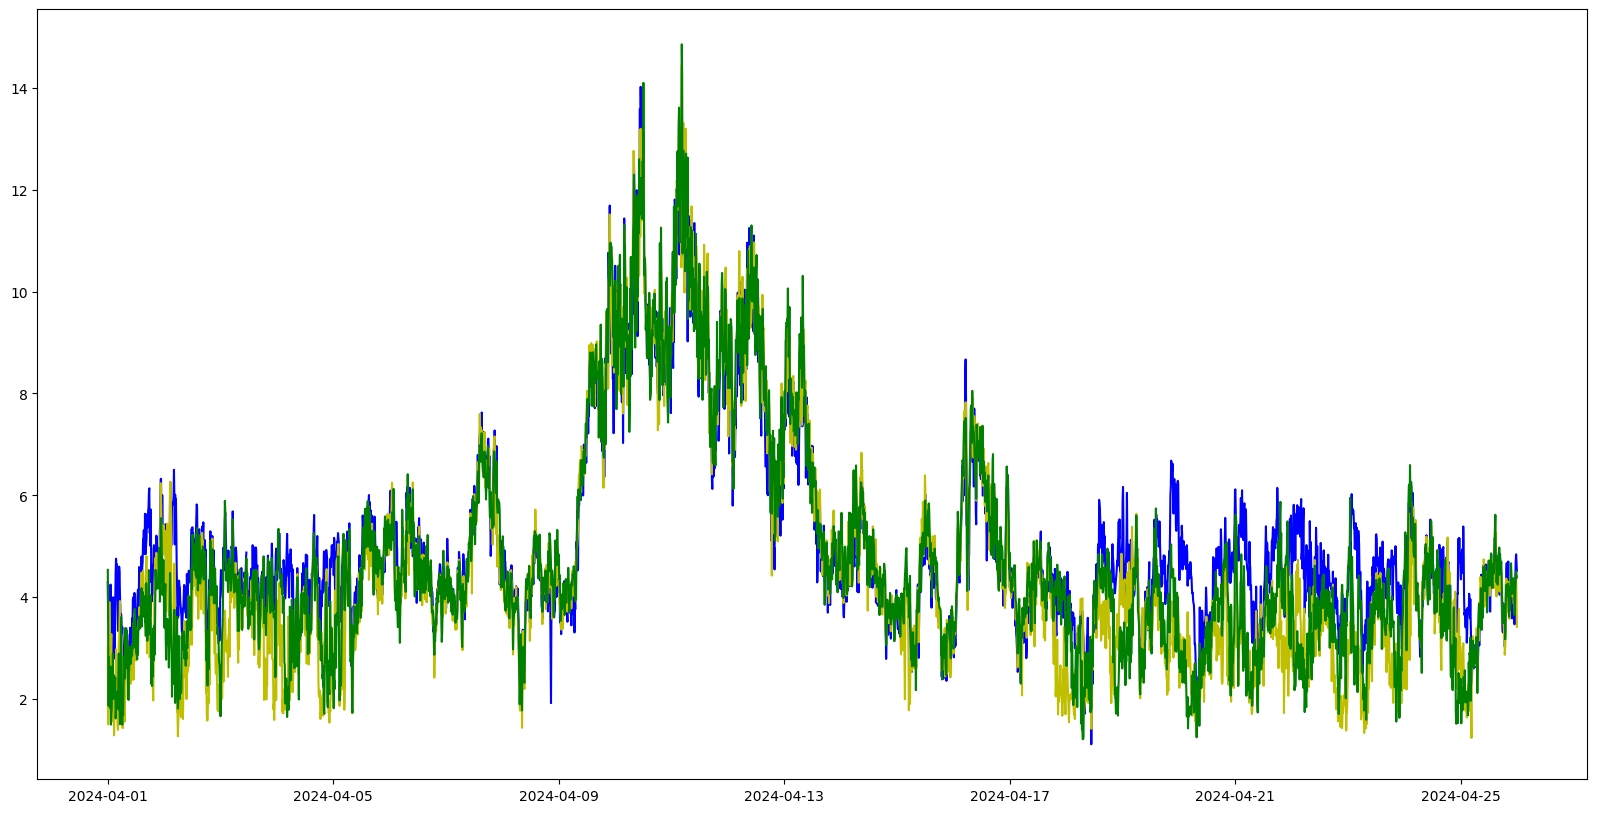

In [ ]:
# VISUALIZE REAL DATA OF WINDSPEED ON TUABINS

plt.figure(1, figsize=(20, 10))
plt.plot(real_wind_df["PCTimeStamp"], real_wind_df["HD01_Ambient WindSpeed Avg. (1)"], "b")
plt.plot(real_wind_df["PCTimeStamp"], real_wind_df["HD02_Ambient WindSpeed Avg. (2)"], "y")
plt.plot(real_wind_df["PCTimeStamp"], real_wind_df["HD03_Ambient WindSpeed Avg. (3)"], "g")
plt.show()

### Prepare data and visualization for glass forecast

In [ ]:
# LOAD FROM CSV TO PANDAS
glass_wind_df = pd.read_csv('csv/glass_forecast_100m.csv')

# SHOW DATA
glass_wind_df.head(5)

time  noaa    sg
0  2024-04-04T00:00:00+00:00  3.35  3.35
1  2024-04-04T01:00:00+00:00  3.75  3.75
2  2024-04-04T02:00:00+00:00  4.16  4.16
3  2024-04-04T03:00:00+00:00  4.56  4.56
4  2024-04-04T04:00:00+00:00  5.05  5.05

In [ ]:
# PREPROCESS: CONVERT DATETIME TYPE, TIMEZONE, NUMERIC TYPE

# Convert to time field to datetime type
glass_wind_df['time'] = pd.to_datetime(glass_wind_df['time']).dt.tz_convert(TIMEZONE)

# Convert some columns to numeric type
numeric_columns = ['noaa', 'sg']
glass_wind_df[numeric_columns] = glass_wind_df[numeric_columns].apply(pd.to_numeric, errors='coerce', axis=1)

In [ ]:
# Set time field as index 
glass_wind_df.set_index('time', inplace=True)
glass_wind_df.head(5)

noaa    sg
time                                 
2024-04-04 07:00:00+07:00  3.35  3.35
2024-04-04 08:00:00+07:00  3.75  3.75
2024-04-04 09:00:00+07:00  4.16  4.16
2024-04-04 10:00:00+07:00  4.56  4.56
2024-04-04 11:00:00+07:00  5.05  5.05

In [ ]:
glass_wind_df.index

DatetimeIndex(['2024-04-04 07:00:00+07:00', '2024-04-04 08:00:00+07:00',
               '2024-04-04 09:00:00+07:00', '2024-04-04 10:00:00+07:00',
               '2024-04-04 11:00:00+07:00', '2024-04-04 12:00:00+07:00',
               '2024-04-04 13:00:00+07:00', '2024-04-04 14:00:00+07:00',
               '2024-04-04 15:00:00+07:00', '2024-04-04 16:00:00+07:00',
               ...
               '2024-05-01 21:00:00+07:00', '2024-05-01 22:00:00+07:00',
               '2024-05-01 23:00:00+07:00', '2024-05-02 00:00:00+07:00',
               '2024-05-02 01:00:00+07:00', '2024-05-02 02:00:00+07:00',
               '2024-05-02 03:00:00+07:00', '2024-05-02 04:00:00+07:00',
               '2024-05-02 05:00:00+07:00', '2024-05-02 06:00:00+07:00'],
              dtype='datetime64[ns, Asia/Ho_Chi_Minh]', name='time', length=576, freq=None)

In [ ]:
# Resample with 10-minute frequency and perform linear interpolation
glass_wind_df = glass_wind_df.resample('10T').interpolate(method='linear')
glass_wind_df.head(5)

/var/folders/3m/lrfnnq890n55hk28xnx6hswc0000gn/T/ipykernel_916/1205144806.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  glass_wind_df = glass_wind_df.resample('10T').interpolate(method='linear')


noaa        sg
time                                         
2024-04-04 07:00:00+07:00  3.350000  3.350000
2024-04-04 07:10:00+07:00  3.416667  3.416667
2024-04-04 07:20:00+07:00  3.483333  3.483333
2024-04-04 07:30:00+07:00  3.550000  3.550000
2024-04-04 07:40:00+07:00  3.616667  3.616667

In [ ]:
# Reset index to get 'time' back as a column
glass_wind_df.reset_index(inplace=True)
glass_wind_df.head(5)

time      noaa        sg
0 2024-04-04 07:00:00+07:00  3.350000  3.350000
1 2024-04-04 07:10:00+07:00  3.416667  3.416667
2 2024-04-04 07:20:00+07:00  3.483333  3.483333
3 2024-04-04 07:30:00+07:00  3.550000  3.550000
4 2024-04-04 07:40:00+07:00  3.616667  3.616667

In [ ]:
# CHECK TYPE OF ALL COLUMNS
glass_wind_df.dtypes

time    datetime64[ns, Asia/Ho_Chi_Minh]
noaa                             float64
sg                               float64
dtype: object

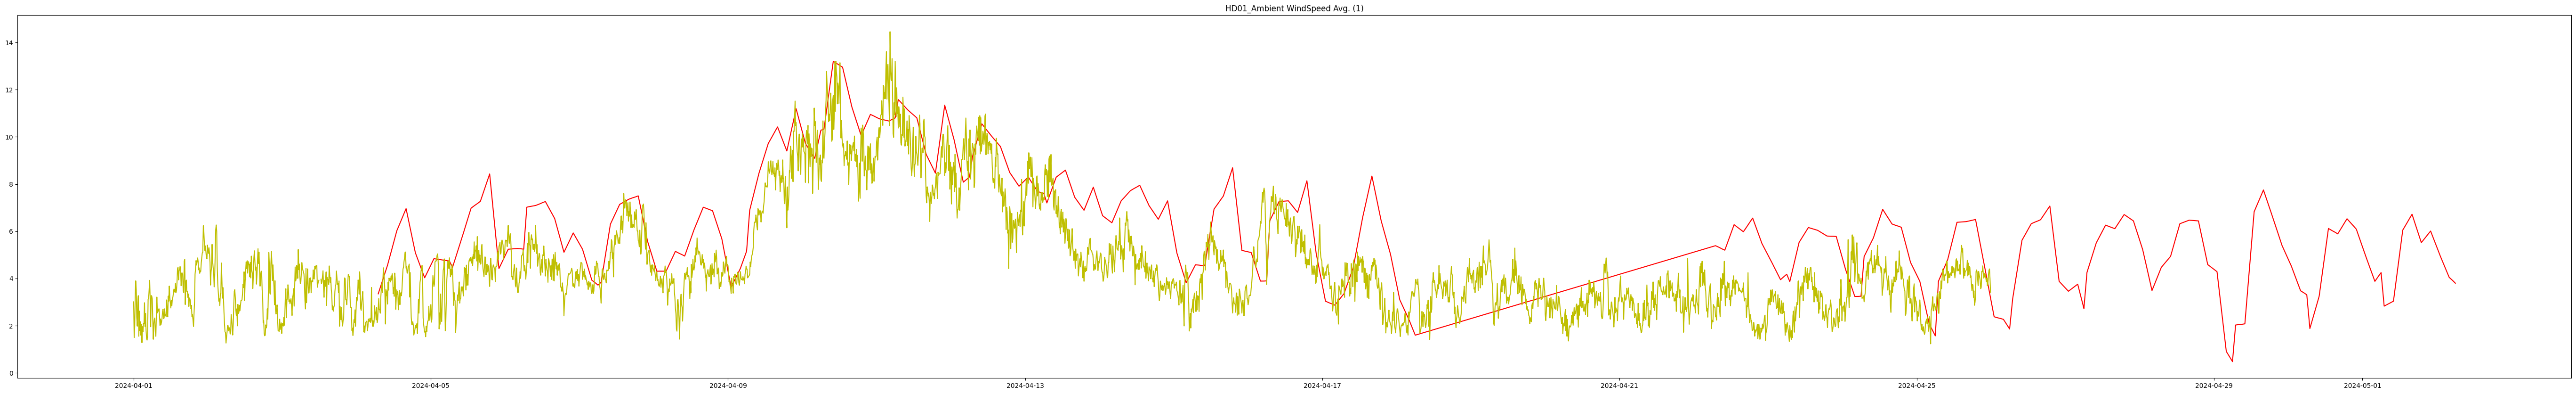

In [ ]:
# VISUALIZE REAL DATA OF WINDSPEED ON TUABINS

plt.figure(1, figsize=(70, 10))
plt.plot(glass_wind_df["time"], glass_wind_df["noaa"], "r")

plt.plot(real_wind_df["PCTimeStamp"], real_wind_df["HD02_Ambient WindSpeed Avg. (2)"], "y")
plt.title("HD01_Ambient WindSpeed Avg. (1)")
plt.show()

### Prepare train & test data

In [ ]:
# SET ENVIRONMENT VARIABLES
# CHOOSED_TUABIN = "HD01_Ambient WindSpeed Avg. (1)"
# CHOOSED_TUABIN = "HD02_Ambient WindSpeed Avg. (2)"
CHOOSED_TUABIN = "HD03_Ambient WindSpeed Avg. (3)"
# CHOOSED_TUABIN = "HD04_Ambient WindSpeed Avg. (4)"
# CHOOSED_TUABIN = "HD05_Ambient WindSpeed Avg. (5)"
# CHOOSED_TUABIN = "HD06_Ambient WindSpeed Avg. (6)"
# CHOOSED_TUABIN = "HD07_Ambient WindSpeed Avg. (7)"
# CHOOSED_TUABIN = "HD08_Ambient WindSpeed Avg. (8)"

GLASS_MODEL = "noaa"

#### Visual whole data

In [ ]:
real_wind_df

PCTimeStamp  HD01_Ambient WindSpeed Avg. (1)  \
0    2024-04-01 00:00:00+07:00                            4.293   
1    2024-04-01 00:10:00+07:00                            3.566   
2    2024-04-01 00:20:00+07:00                            3.898   
3    2024-04-01 00:30:00+07:00                            3.762   
4    2024-04-01 00:40:00+07:00                            3.691   
...                        ...                              ...   
3595 2024-04-25 23:10:00+07:00                            4.383   
3596 2024-04-25 23:20:00+07:00                            4.699   
3597 2024-04-25 23:30:00+07:00                            4.840   
3598 2024-04-25 23:40:00+07:00                            4.676   
3599 2024-04-25 23:50:00+07:00                            4.516   

      HD02_Ambient WindSpeed Avg. (2)  HD03_Ambient WindSpeed Avg. (3)  \
0                               3.012                            4.535   
1                               1.500                            3.102   
2                               1.965                            1.863   
3                               3.242                            2.824   
4                               3.902                            2.176   
...                               ...                              ...   
3595                            4.152                            4.113   
3596                            4.344                            4.313   
3597                            4.406                            4.508   
3598                            4.012                            4.449   
3599                            3.418                            4.387   

      HD04_Ambient WindSpeed Avg. (4)  HD05_Ambient WindSpeed Avg. (5)  \
0                               3.637                            4.395   
1                               2.543                            3.117   
2                               2.402                            2.410   
3                               3.008                            2.254   
4                               3.512                            2.387   
...                               ...                              ...   
3595                            4.191                            4.316   
3596                            4.164                            4.355   
3597                            4.152                            4.289   
3598                            4.277                            4.223   
3599                            3.551                            4.117   

      HD06_Ambient WindSpeed Avg. (6)  HD07_Ambient WindSpeed Avg. (7)  \
0                               3.758                            3.484   
1                               3.230                            2.574   
2                               2.215                            1.832   
3                               2.461                            2.258   
4                               3.168                            3.094   
...                               ...                              ...   
3595                            4.430                            4.352   
3596                            4.168                            4.566   
3597                            4.066                            4.336   
3598                            3.906                            4.184   
3599                            3.797                            3.680   

      HD08_Ambient WindSpeed Avg. (8)  
0                               3.262  
1                               2.766  
2                               2.148  
3                               2.207  
4                               2.207  
...                               ...  
3595                            4.203  
3596                            4.648  
3597                            4.520  
3598                            4.469  
3599                            4.188  

[3600 rows x 9 columns]

In [ ]:
glass_wind_df

time      noaa        sg
0    2024-04-04 07:00:00+07:00  3.350000  3.350000
1    2024-04-04 07:10:00+07:00  3.416667  3.416667
2    2024-04-04 07:20:00+07:00  3.483333  3.483333
3    2024-04-04 07:30:00+07:00  3.550000  3.550000
4    2024-04-04 07:40:00+07:00  3.616667  3.616667
...                        ...       ...       ...
4022 2024-05-02 05:20:00+07:00  3.886667  3.886667
4023 2024-05-02 05:30:00+07:00  3.865000  3.865000
4024 2024-05-02 05:40:00+07:00  3.843333  3.843333
4025 2024-05-02 05:50:00+07:00  3.821667  3.821667
4026 2024-05-02 06:00:00+07:00  3.800000  3.800000

[4027 rows x 3 columns]

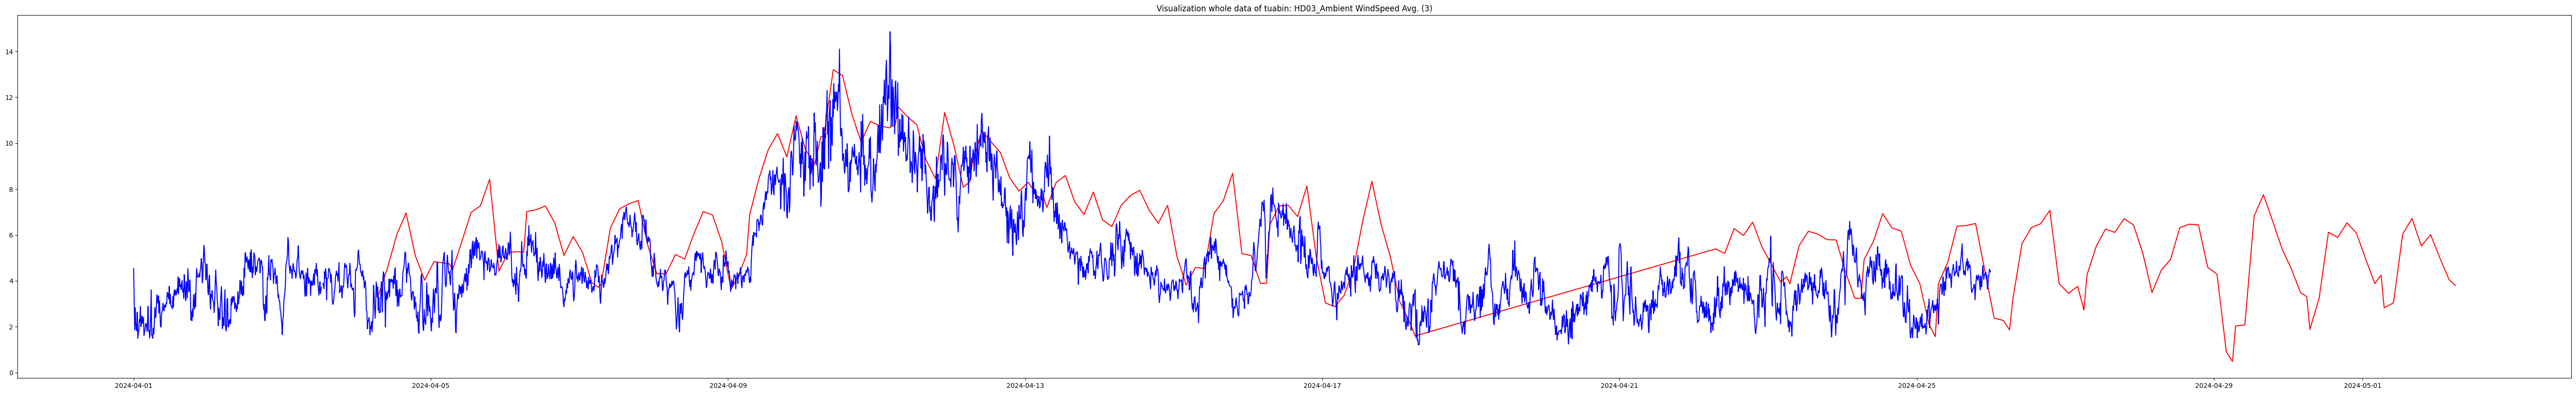

In [ ]:
# Visualize whole data
plt.figure(1, figsize=(70, 10))
plt.plot(glass_wind_df["time"], glass_wind_df[GLASS_MODEL], "r")

plt.plot(real_wind_df["PCTimeStamp"], real_wind_df[CHOOSED_TUABIN], "b")
plt.title(f"Visualization whole data of tuabin: {CHOOSED_TUABIN}")
plt.show()

#### Prepare the training data

In [ ]:
train_real_wind_df = real_wind_df[real_wind_df["PCTimeStamp"] >= "2024-04-04 07:00:00+00:00"]
train_real_wind_df = train_real_wind_df[train_real_wind_df["PCTimeStamp"] <= "2024-04-16 23:50:00+07:00"]

y_train_real = np.array(train_real_wind_df[CHOOSED_TUABIN])
print(train_real_wind_df)
print("y_train_real.shape = ", y_train_real.shape)


                   PCTimeStamp  HD01_Ambient WindSpeed Avg. (1)  \
516  2024-04-04 14:00:00+07:00                            3.926   
517  2024-04-04 14:10:00+07:00                            4.012   
518  2024-04-04 14:20:00+07:00                            3.512   
519  2024-04-04 14:30:00+07:00                            3.797   
520  2024-04-04 14:40:00+07:00                            3.813   
...                        ...                              ...   
2299 2024-04-16 23:10:00+07:00                            6.391   
2300 2024-04-16 23:20:00+07:00                            5.691   
2301 2024-04-16 23:30:00+07:00                            5.273   
2302 2024-04-16 23:40:00+07:00                            4.852   
2303 2024-04-16 23:50:00+07:00                            4.426   

      HD02_Ambient WindSpeed Avg. (2)  HD03_Ambient WindSpeed Avg. (3)  \
516                             2.891                            3.645   
517                             3.316          

In [ ]:
# Filter glass-forecast data
train_glass_wind_df = glass_wind_df[glass_wind_df["time"] >= "2024-04-04 07:00:00+00:00"]
train_glass_wind_df = train_glass_wind_df[train_glass_wind_df["time"] <= "2024-04-16 23:50:00+07:00"]

y_train_predict = np.array(train_glass_wind_df[GLASS_MODEL]).copy()
X_train = np.array(train_glass_wind_df[GLASS_MODEL]).copy().reshape(-1, 1)

print(train_glass_wind_df)
print("X_train.shape = ", X_train.shape)
print("y_train_predict.shape = ", y_train_predict.shape)

                          time      noaa        sg
42   2024-04-04 14:00:00+07:00  6.330000  6.330000
43   2024-04-04 14:10:00+07:00  6.383333  6.383333
44   2024-04-04 14:20:00+07:00  6.436667  6.436667
45   2024-04-04 14:30:00+07:00  6.490000  6.490000
46   2024-04-04 14:40:00+07:00  6.543333  6.543333
...                        ...       ...       ...
1825 2024-04-16 23:10:00+07:00  4.276667  4.276667
1826 2024-04-16 23:20:00+07:00  4.163333  4.163333
1827 2024-04-16 23:30:00+07:00  4.050000  4.050000
1828 2024-04-16 23:40:00+07:00  3.936667  3.936667
1829 2024-04-16 23:50:00+07:00  3.823333  3.823333

[1788 rows x 3 columns]
X_train.shape =  (1788, 1)
y_train_predict.shape =  (1788,)


In [ ]:
# Visualize training data
plt.figure(1, figsize=(70, 10))
plt.plot(train_glass_wind_df["time"], train_glass_wind_df[GLASS_MODEL], "r")

plt.plot(train_real_wind_df["PCTimeStamp"], train_real_wind_df[CHOOSED_TUABIN], "b")
plt.title("Visualization Training Data")
plt.show()

#### Prepare the testing data

In [ ]:
test_real_wind_df = real_wind_df[real_wind_df["PCTimeStamp"] >= "2024-04-22 07:00:00+07:00"]
test_real_wind_df = test_real_wind_df[test_real_wind_df["PCTimeStamp"] <= "2024-04-25 23:50:00+07:00"]

y_test_real = np.array(test_real_wind_df[CHOOSED_TUABIN])

print(y_test_real)
print("y_test_real.shape = ", y_test_real.shape)

[2.41  3.211 2.883 3.469 4.195 3.367 3.699 2.734 2.578 2.387 3.082 2.703
 3.297 2.816 3.863 3.754 3.938 4.617 3.707 3.371 3.84  3.914 3.402 3.477
 3.992 3.742 3.938 3.355 2.957 3.684 3.344 3.746 3.477 4.059 3.887 3.793
 4.082 4.383 3.785 4.434 4.316 3.957 3.93  4.113 3.535 3.758 3.699 4.145
 3.734 3.664 3.879 3.793 3.609 3.664 4.113 3.004 3.461 3.883 3.594 3.793
 3.406 3.402 3.113 4.191 3.16  3.766 3.121 3.477 3.438 3.246 3.195 2.988
 3.047 3.145 3.16  2.473 2.254 1.824 1.703 1.977 2.137 2.598 3.406 3.344
 2.406 3.473 4.23  4.242 3.582 3.656 2.844 2.879 3.25  3.691 3.109 2.676
 2.012 3.457 3.438 4.094 4.027 4.441 4.617 4.609 4.977 4.84  4.914 5.949
 4.449 3.469 2.906 4.016 4.793 4.301 4.016 3.742 3.098 2.629 2.281 2.652
 3.031 2.711 2.613 2.793 2.531 3.031 2.133 3.516 4.332 4.426 4.402 4.262
 3.777 3.789 3.93  3.313 3.191 2.535 2.664 2.477 2.328 1.992 2.289 1.773
 2.215 2.082 2.207 1.98  1.59  2.246 2.898 2.711 3.141 3.469 3.582 2.953
 3.566 2.695 2.965 3.105 3.867 3.73  3.563 2.984 3.

In [ ]:
test_glass_wind_df = glass_wind_df[glass_wind_df["time"] >= "2024-04-22 07:00:00+07:00"]
test_glass_wind_df = test_glass_wind_df[test_glass_wind_df["time"] <= "2024-04-25 23:50:00+07:00"]

y_test_predict = np.array(test_glass_wind_df[GLASS_MODEL]).copy()
X_test = np.array(test_glass_wind_df[GLASS_MODEL]).copy().reshape(-1, 1)

print(test_glass_wind_df)
print("X_test.shape = ", X_test.shape)
print("y_test_predict.shape = ", y_test_predict.shape)


                          time   noaa     sg
2592 2024-04-22 07:00:00+07:00  5.390  5.390
2593 2024-04-22 07:10:00+07:00  5.380  5.380
2594 2024-04-22 07:20:00+07:00  5.370  5.370
2595 2024-04-22 07:30:00+07:00  5.360  5.360
2596 2024-04-22 07:40:00+07:00  5.350  5.350
...                        ...    ...    ...
3121 2024-04-25 23:10:00+07:00  3.645  3.645
3122 2024-04-25 23:20:00+07:00  3.530  3.530
3123 2024-04-25 23:30:00+07:00  3.415  3.415
3124 2024-04-25 23:40:00+07:00  3.300  3.300
3125 2024-04-25 23:50:00+07:00  3.185  3.185

[534 rows x 3 columns]
X_test.shape =  (534, 1)
y_test_predict.shape =  (534,)


In [ ]:
# Visualize testing data
plt.figure(1, figsize=(70, 10))
plt.plot(test_glass_wind_df["time"], test_glass_wind_df[GLASS_MODEL], "r")

plt.plot(test_real_wind_df["PCTimeStamp"], test_real_wind_df[CHOOSED_TUABIN], "b")
plt.title("Visualization Testing Data")
plt.show()

### Metric Definition

In [ ]:
# Calculate Mean Absolute Percentage Error (MAPE)
def mape_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Algorithm 01: Minus a constant (1.5)

In [ ]:
CONSTANT = 1.5

In [ ]:
# Visualize training data
plt.figure(1, figsize=(70, 10))
plt.plot(train_glass_wind_df["time"], train_glass_wind_df[GLASS_MODEL]-CONSTANT, "r")

plt.plot(train_real_wind_df["PCTimeStamp"], train_real_wind_df[CHOOSED_TUABIN], "b")
plt.title("Visualization Train Data: Minus Constant")
plt.show()

In [ ]:
print("===== [TRAIN SET] MEASURE ALGORITHM: MINUS CONST \n")

windspeed_mape_error= mape_error(y_train_real, y_train_predict-CONSTANT)
print("[TRAIN] MAPE ERROR (MINUS CONSTANT) = ", windspeed_mape_error)

===== [TRAIN SET] MEASURE ALGORITHM: MINUS CONST 

[TRAIN] MAPE ERROR (MINUS CONSTANT) =  19.12556911861328


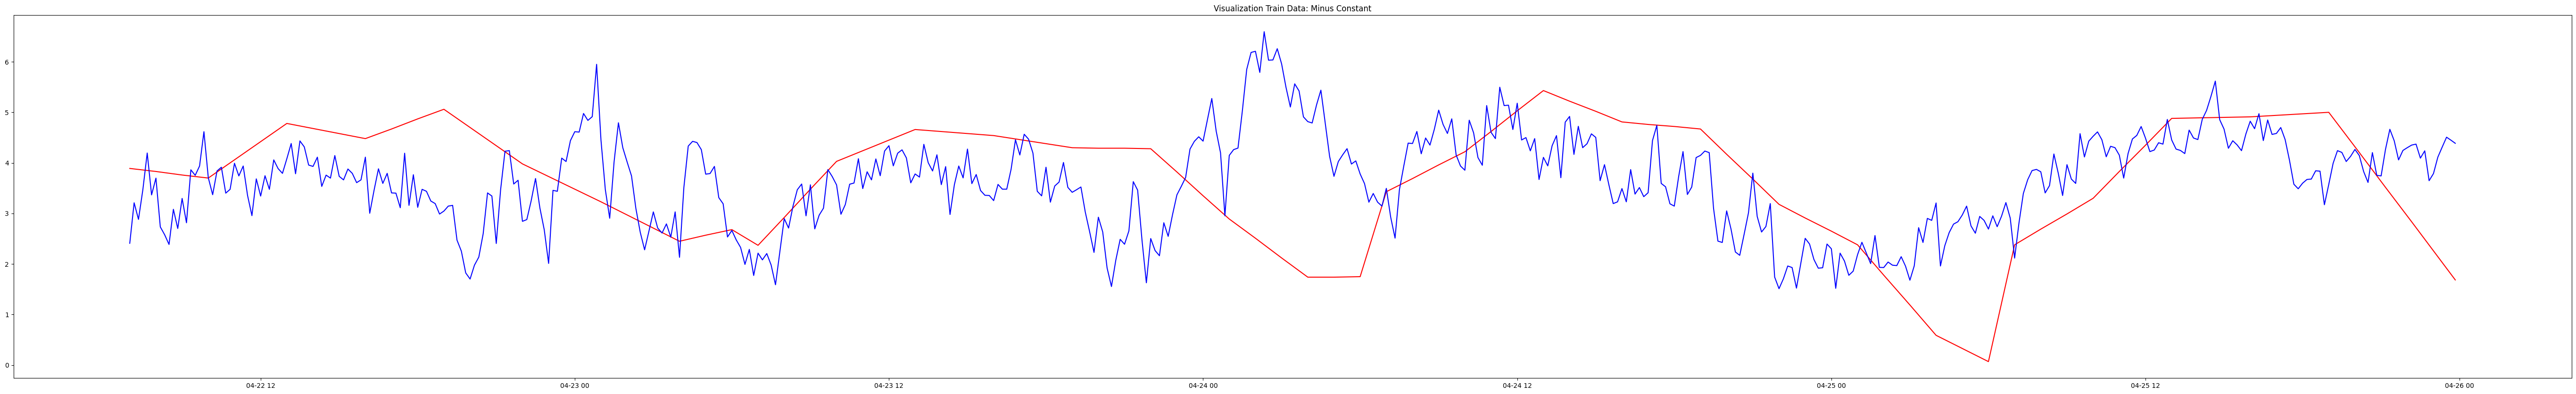

In [ ]:
# Visualize testing data
plt.figure(1, figsize=(70, 10))
plt.plot(test_glass_wind_df["time"], test_glass_wind_df[GLASS_MODEL]-CONSTANT, "r")

plt.plot(test_real_wind_df["PCTimeStamp"], test_real_wind_df[CHOOSED_TUABIN], "b")
plt.title("Visualization Train Data: Minus Constant")
plt.show()

In [ ]:
print("===== [TEST SET] MEASURE ALGORITHM: MINUS CONST \n")

windspeed_mape_error= mape_error(y_test_real, y_test_predict-CONSTANT)
print("[TEST] MAPE ERROR (MINUS CONSTANT) = ", windspeed_mape_error)

===== [TEST SET] MEASURE ALGORITHM: MINUS CONST 

[TEST] MAPE ERROR (MINUS CONSTANT) =  30.49861538616552


### Algorithm 02: Based-on Past Window Length

In [ ]:
print("========= [TRAIN] Algorithm 02: Based-on Past Window Context Length \n")

adjust_windspeeds = []
past_window_length = 40
future_window_length = 20
array_length = y_train_predict.shape[0]

print("array_length = ", array_length)

def get_average_difference(source_array, start_index, stop_index):
    return source_array[start_index:stop_index].sum()

adjust_windspeeds += list(y_train_real[:past_window_length])
print(adjust_windspeeds)

difference = y_train_predict[:past_window_length] - np.array(adjust_windspeeds)

print("difference = ", difference)
print("===== len(adjust_windspeeds) = ", len(adjust_windspeeds))

print(list(range(past_window_length, array_length, future_window_length)))

for index in range(past_window_length, array_length, future_window_length):
    tempo_diff_average = get_average_difference(difference, index-past_window_length, index) / past_window_length

    if index + future_window_length < array_length:
        adjust_windspeeds += list(y_train_predict[index:index+future_window_length]-tempo_diff_average)
        difference = np.array(y_train_predict[:index + future_window_length]) - np.array(adjust_windspeeds)[:index + future_window_length]
    else: 
        adjust_windspeeds += list(y_train_predict[index:array_length]-tempo_diff_average)
        difference = np.array(y_train_predict[:index + future_window_length]) - np.array(adjust_windspeeds)[:index + future_window_length]
    
    print("===== len(adjust_windspeeds) = ", len(adjust_windspeeds))
    print("tempo_diff_average = ", tempo_diff_average)

print("glass_predicted_windspeeds = ", y_train_predict)
print("adjust_windspeeds = ", adjust_windspeeds)
print("len(adjust_windspeeds) = ", len(adjust_windspeeds))

========= [TRAIN] Algorithm 02: Based-on Past Window Context Length 

array_length =  1788
[3.645, 3.289, 3.328, 3.363, 3.352, 4.004, 4.379, 4.527, 4.625, 4.977, 5.258, 5.234, 4.695, 3.934, 4.543, 4.344, 4.742, 4.773, 4.371, 4.238, 4.195, 3.813, 3.297, 3.164, 3.484, 3.547, 3.508, 3.23, 2.758, 3.305, 2.879, 3.047, 2.406, 2.477, 2.242, 2.645, 1.773, 1.707, 2.582, 2.855]
difference =  [2.685      3.09433333 3.10866667 3.127      3.19133333 2.59266667
 2.271      2.17466667 2.12833333 1.828      1.59866667 1.67433333
 2.265      2.92266667 2.21033333 2.306      1.80466667 1.67033333
 1.969      1.997      1.935      2.212      2.623      2.651
 2.226      2.05966667 1.99533333 2.17       2.53866667 1.88833333
 2.211      1.98466667 2.56733333 2.438      2.61466667 2.15333333
 2.967      2.973      2.038      1.705     ]
===== len(adjust_windspeeds) =  40
[40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580,

In [ ]:
print("===== [TRAIN SET] MEASURE ALGORITHM: Based-on Past Window Length \n")

windspeed_mape_error= mape_error(y_train_real, adjust_windspeeds)
print("[TRAIN] MAPE ERROR (MINUS CONSTANT) = ", windspeed_mape_error)

===== [TRAIN SET] MEASURE ALGORITHM: Based-on Past Window Length 

[TRAIN] MAPE ERROR (MINUS CONSTANT) =  22.29854796661548


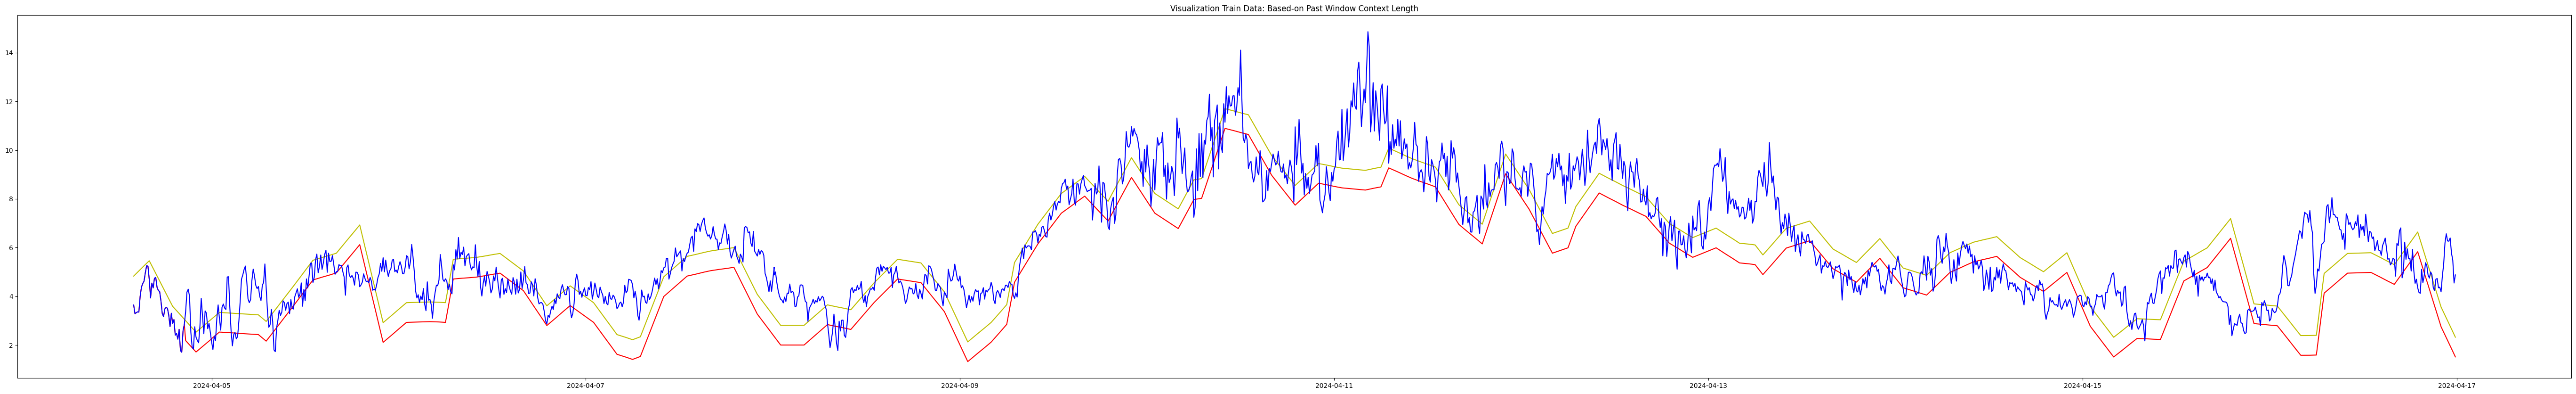

In [ ]:
# Visualize testing data
plt.figure(1, figsize=(70, 10))
plt.plot(train_glass_wind_df["time"], adjust_windspeeds, "r")
plt.plot(train_glass_wind_df["time"], train_glass_wind_df[GLASS_MODEL]-CONSTANT, "y")

plt.plot(train_real_wind_df["PCTimeStamp"], train_real_wind_df[CHOOSED_TUABIN], "b")
plt.title("Visualization Train Data: Based-on Past Window Context Length")
plt.show()

### Algorithm 03: Using MAPE to Estimate Constant

In [ ]:
import numpy as np

train_index_range = range(0, 720) # 1 MONTH LATER

print("Train Length = ", len(y_train_predict))
print("Test Length = ", len(y_test_predict))

best_train_value = None
best_train_error = 1000.0
for value in np.arange(-5, 5, 0.1):
    mape_error_value = mape_error(y_train_real[train_index_range], y_train_predict[train_index_range]-value)
    if mape_error_value < best_train_error:
        best_train_error = mape_error_value
        best_train_value = value

print("\n[TRAIN] best_train_error = ", best_train_error)
print("[TRAIN] best_train_value = ", best_train_value)

test_mape_error = mape_error(y_test_real, y_test_predict-best_train_value)
print("\nMAPE OF TEST SET:", test_mape_error)

best_test_value = None
best_test_error = 1000
for value in np.arange(-5, 5, 0.1):
    mape_error_value = mape_error(y_test_real, y_test_predict-value)
    if mape_error_value < best_test_error:
        best_test_error = mape_error_value
        best_test_value = value

print("\n[TEST] best_test_error = ", best_test_error)
print("[TEST] best_test_value = ", best_test_value)

Train Length =  1788
Test Length =  534

[TRAIN] best_train_error =  19.53950741598638
[TRAIN] best_train_value =  1.499999999999977

MAPE OF TEST SET: 30.49861538616574

[TEST] best_test_error =  28.317175649580967
[TEST] best_test_value =  1.8999999999999755


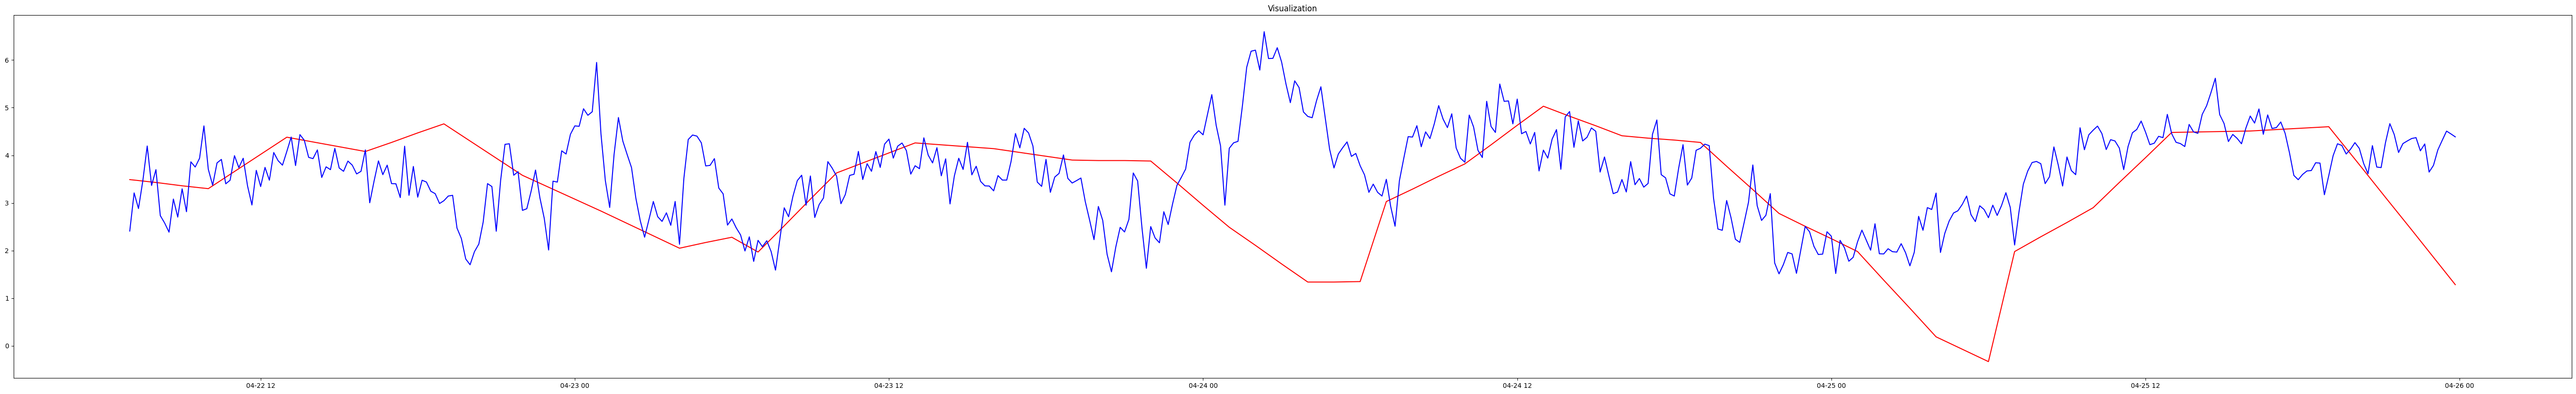

In [ ]:
# Visualize training data
plt.figure(1, figsize=(70, 10))
plt.plot(test_glass_wind_df["time"], test_glass_wind_df[GLASS_MODEL]-best_test_value, "r")

plt.plot(test_real_wind_df["PCTimeStamp"], test_real_wind_df[CHOOSED_TUABIN], "b")
plt.title("Visualization")
plt.show()

In [ ]:
print("===== [TEST SET] MEASURE ALGORITHM \n")

windspeed_mape_error= mape_error(y_test_real[:40], y_test_predict[:40]-best_test_value)
print("[TEST] MAPE ERROR = ", windspeed_mape_error)

===== [TEST SET] MEASURE ALGORITHM 

[TEST] MAPE ERROR =  13.310383615940202


In [ ]:
def calculate_wind_power_3_6(wind_speed):
    """Calculate wind power 3.6 based on passing parameters"""

    wind_power_3_6 = 0
    if wind_speed < 2.75:
        wind_power_3_6 = 0

    elif 2.75 <= wind_speed < 4:
        wind_power_3_6 = 38594.4795 * wind_speed ** 2 + -91774.18866 * wind_speed + -6930.505107

    elif 4 <= wind_speed < 5:
        wind_power_3_6 = 50328.66804 * wind_speed ** 2 + -179633.9254 * wind_speed + 156761.425

    elif 5 <= wind_speed < 6:
        wind_power_3_6 = 70574.72694 * wind_speed ** 2 + -368403.0998 * wind_speed + 594455.8249

    elif 6 <= wind_speed < 7:
        wind_power_3_6 = 99800.19027 * wind_speed ** 2 + -725397.4515 * wind_speed + 1684305.255

    elif 7 <= wind_speed < 8:
        wind_power_3_6 = 101486.9799 * wind_speed ** 2 + -775460.2669 * wind_speed + 1952092.272

    elif 8 <= wind_speed <= 9:
        wind_power_3_6 = -93714.5505 * wind_speed ** 2 + 2452570.509 * wind_speed + -11379255.99

    elif 9 < wind_speed < 10:
        wind_power_3_6 = -268000 * wind_speed ** 2 + 5516000 * wind_speed + -24863000

    elif 10 <= wind_speed < 11:
        wind_power_3_6 = -52000 * wind_speed ** 2 + 1164000 * wind_speed + -2943000

    elif 11 <= wind_speed < 19.5:
        wind_power_3_6 = 3600000

    elif 19.5 <= wind_speed < 20.499:
        wind_power_3_6 = 3544000

    elif 20.499 <= wind_speed < 21.499:
        wind_power_3_6 = 3400000

    elif 21.499 <= wind_speed < 22.499:
        wind_power_3_6 = 2354000

    elif wind_speed < 23.499:
        wind_power_3_6 = 2050000

    elif wind_speed < 25.01:
        wind_power_3_6 = 1280000
    else:
        wind_power_3_6 = 0

    return wind_power_3_6

In [ ]:
prediction = test_glass_wind_df[GLASS_MODEL]-best_test_value
# print(prediction)
predict_power = prediction.apply(calculate_wind_power_3_6)
print(np.array(predict_power)/1000000)

[0.1428622  0.1410899  0.13932533 0.13756847 0.13581934 0.13407792
 0.13234422 0.13033133 0.12832894 0.12633706 0.12435569 0.12238482
 0.12042446 0.11875251 0.11708828 0.11543177 0.11378298 0.11214191
 0.11050855 0.12042446 0.13061824 0.1410899  0.15183945 0.16286687
 0.17417217 0.18575536 0.19761642 0.20975537 0.22217219 0.2348669
 0.24796445 0.26164615 0.27569021 0.29009664 0.30486544 0.3199966
 0.33549013 0.33115002 0.32683788 0.32255369 0.31829747 0.3140692
 0.3098689  0.30569655 0.30155217 0.29743574 0.29334728 0.28928678
 0.28525424 0.28124965 0.27727303 0.27332437 0.26940367 0.26551093
 0.26164615 0.26901314 0.27648106 0.28404993 0.29171973 0.29949046
 0.30736214 0.31575715 0.32426401 0.33288271 0.34161325 0.35045564
 0.35940986 0.36801997 0.37673101 0.38554299 0.39445591 0.40346976
 0.41258456 0.39539998 0.37857778 0.36211794 0.34602047 0.33028536
 0.31491262 0.29990224 0.28525424 0.2709686  0.25704532 0.24348441
 0.23060445 0.21800238 0.20567818 0.19363186 0.18186342 0.1703728

In [ ]:
print(np.min(y_train_real))
print(np.max(y_train_real))
print(np.min(y_train_predict-1.5))
print(np.max(y_train_predict-1.5))

1.707
14.859
2.13
11.7


### Algorithm 04: Linear Regression Degree 1

In [ ]:
# IMPLEMENT LINEAR REGRESSION
print("======== Algorithm 04: Linear Regression Degree 1 \n")

from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train_real)

# Get the coefficients (weights)
lr_coefficients = lr_model.coef_

# Get the intercept
lr_intercept = lr_model.intercept_

print("\nLR Coefficients:", lr_coefficients)
print("LR Intercept:", lr_intercept)

y_predict_lr = lr_model.predict(X_test)
print("\ny_predict_lr = ", y_predict_lr)

======== Algorithm 04: Linear Regression Degree 1 


LR Coefficients: [0.91840742]
LR Intercept: -0.684409123065377

y_predict_lr =  [4.26580685 4.25662278 4.2474387  4.23825463 4.22907055 4.21988648
 4.21070241 4.19998765 4.1892729  4.17855815 4.16784339 4.15712864
 4.14641389 4.13722981 4.12804574 4.11886166 4.10967759 4.10049352
 4.09130944 4.14641389 4.20151833 4.25662278 4.31172722 4.36683167
 4.42193611 4.47704056 4.532145   4.58724945 4.64235389 4.69745834
 4.75256278 4.80766723 4.86277167 4.91787612 4.97298056 5.02808501
 5.08318945 5.06788266 5.05257587 5.03726908 5.02196229 5.0066555
 4.99134871 4.97604192 4.96073513 4.94542834 4.93012155 4.91481476
 4.89950797 4.88420118 4.86889439 4.8535876  4.83828081 4.82297402
 4.80766723 4.83675013 4.86583303 4.89491593 4.92399883 4.95308173
 4.98216464 5.01277822 5.0433918  5.07400538 5.10461896 5.13523254
 5.16584612 5.19492902 5.22401192 5.25309482 5.28217773 5.31126063
 5.34034353 5.28523908 5.23013464 5.17503019 5.11992575 5.064821

===== PLOT Algorithm 04: Linear Regression Degree 1 



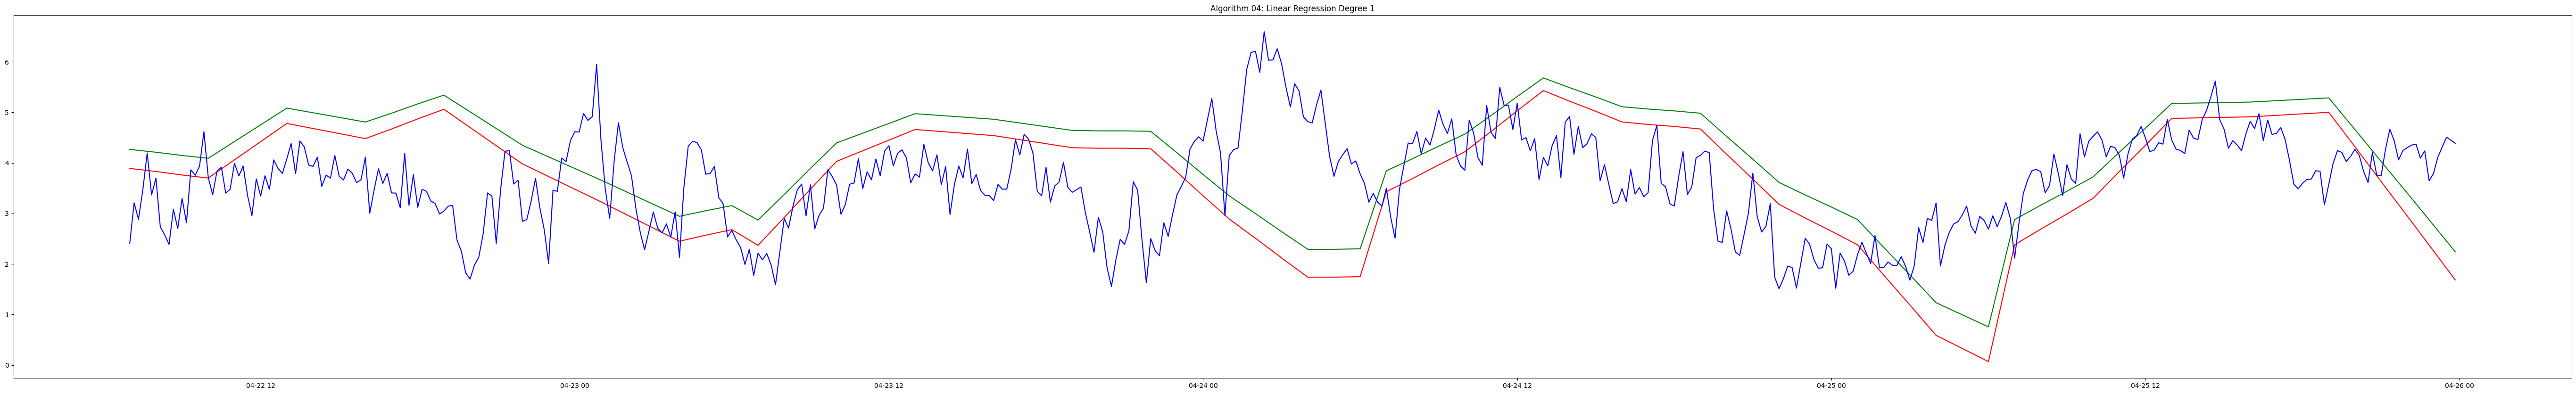

In [ ]:
print("===== PLOT Algorithm 04: Linear Regression Degree 1 \n")

plt.figure(1, figsize=(70, 10))
plt.plot(test_glass_wind_df["time"], test_glass_wind_df[GLASS_MODEL]-CONSTANT, "r")
plt.plot(test_glass_wind_df["time"], y_predict_lr, "g") 

plt.plot(test_real_wind_df["PCTimeStamp"], test_real_wind_df[CHOOSED_TUABIN], "b")
plt.title("Algorithm 04: Linear Regression Degree 1")
plt.show()

In [ ]:
print("===== [TEST SET] Algorithm 04: Linear Regression Degree 1 \n")

windspeed_mape_error= mape_error(y_test_real, y_predict_lr)
print("[TRAIN] MAPE ERROR = ", windspeed_mape_error)

===== [TEST SET] Algorithm 04: Linear Regression Degree 1 

[TRAIN] MAPE ERROR =  34.06572413302648


### Algorithm 05: Linear Regression Degree 5

In [ ]:
print("======== IMPLEMENT LINEAR REGRESSION DEGREE 5 \n")

# Combine original feature and squared feature
X_train_extended = np.concatenate((X_train, X_train**2, X_train**3, X_train**4, X_train**5), axis=1)

from sklearn.linear_model import LinearRegression
lr_model_poly = LinearRegression()
lr_model_poly.fit(X_train_extended, y_train_real)

# Get the coefficients (weights)
coefficients = lr_model_poly.coef_

# Get the intercept
intercept = lr_model_poly.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

======== IMPLEMENT LINEAR REGRESSION DEGREE 5 

Coefficients: [ 7.37710126e+00 -2.87977045e+00  4.66218564e-01 -3.21494977e-02
  8.00866705e-04]
Intercept: -1.5804668535753796


In [ ]:
y_train_predict_lr_poly = lr_model_poly.predict(X_train_extended)
y_train_predict_lr_poly

array([4.49981357, 4.5418596 , 4.58544959, ..., 4.25539103, 4.31085015,
       4.36952709])

===== PLOT Algorithm 05: Linear Regression Poly 



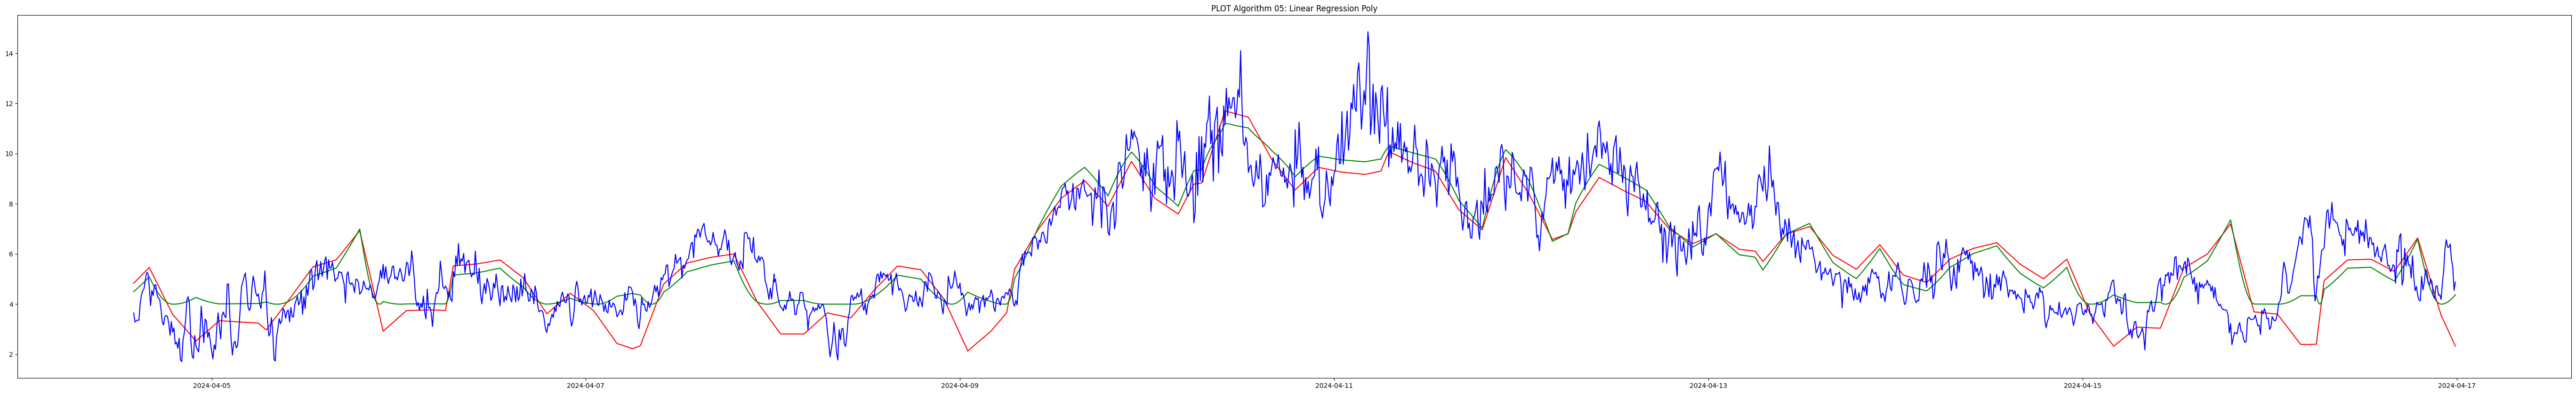

In [ ]:
print("===== PLOT Algorithm 05: Linear Regression Poly \n")

plt.figure(1, figsize=(70, 10))
plt.plot(train_glass_wind_df["time"], train_glass_wind_df[GLASS_MODEL]-CONSTANT, "r")
plt.plot(train_glass_wind_df["time"], y_train_predict_lr_poly, "g") 

plt.plot(train_real_wind_df["PCTimeStamp"], train_real_wind_df[CHOOSED_TUABIN], "b")
plt.title("PLOT Algorithm 05: Linear Regression Poly")
plt.show()

In [ ]:
print("===== [TRAIN SET] Algorithm 05: Linear Regression Poly \n")

windspeed_mape_error= mape_error(y_train_real, y_train_predict_lr_poly)
print("[TRAIN] MAPE ERROR = ", windspeed_mape_error)

===== [TRAIN SET] Algorithm 05: Linear Regression Poly 

[TRAIN] MAPE ERROR =  16.808544959307508


In [ ]:
# Combine original feature and squared feature
X_test_extended = np.concatenate((X_test, X_test**2, X_test**3, X_test**4, X_test**5), axis=1)

y_test_predict_lr_poly = lr_model_poly.predict(X_test_extended)

In [ ]:
print("===== [TEST SET] Algorithm 05: Linear Regression Poly \n")

windspeed_mape_error= mape_error(y_test_real, y_test_predict_lr_poly)
print("[TEST] MAPE ERROR = ", windspeed_mape_error)

===== [TEST SET] Algorithm 05: Linear Regression Poly 

[TEST] MAPE ERROR =  32.41156687187314


===== [TEST SET] PLOT Algorithm 05: Linear Regression Poly 



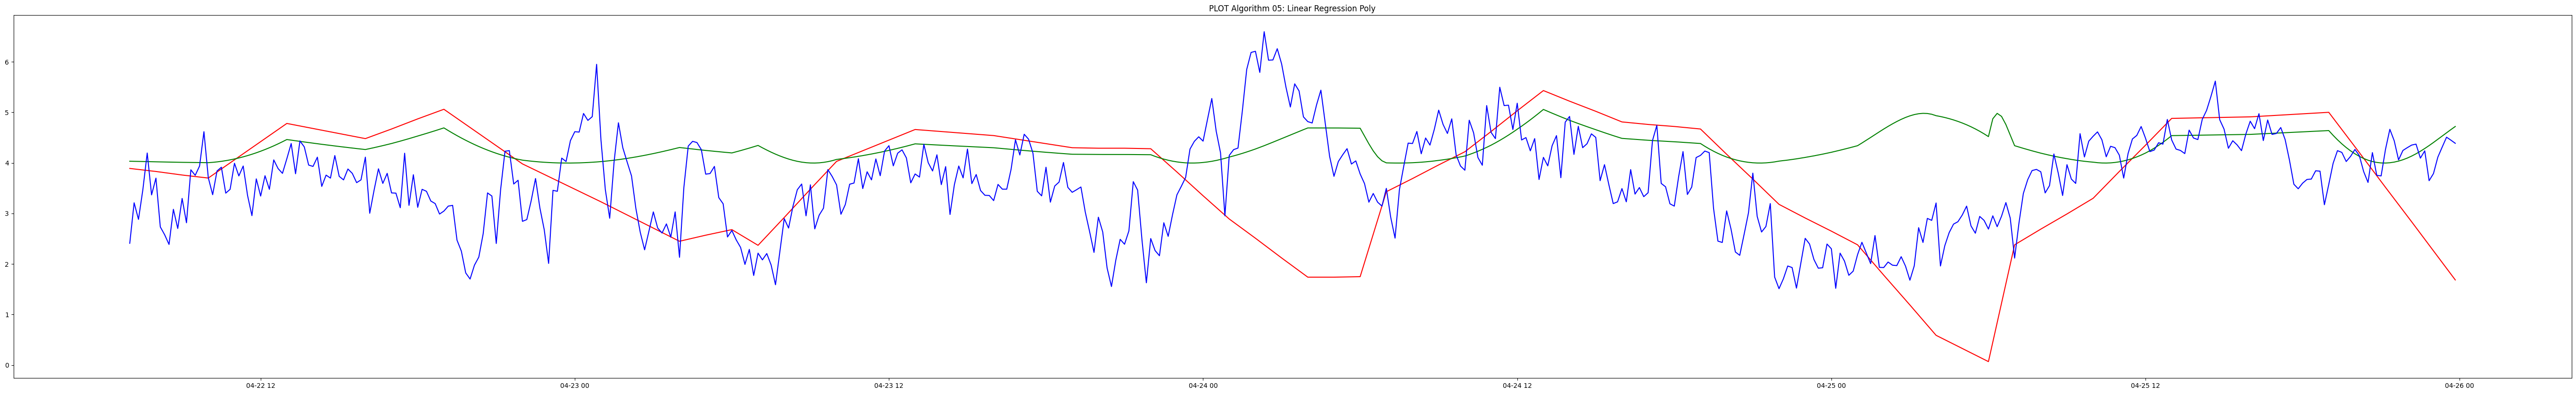

In [ ]:
print("===== [TEST SET] PLOT Algorithm 05: Linear Regression Poly \n")

plt.figure(1, figsize=(70, 10))
plt.plot(test_glass_wind_df["time"], test_glass_wind_df[GLASS_MODEL]-CONSTANT, "r")
plt.plot(test_glass_wind_df["time"], y_test_predict_lr_poly, "g") 

plt.plot(test_real_wind_df["PCTimeStamp"], test_real_wind_df[CHOOSED_TUABIN], "b")
plt.title("PLOT Algorithm 05: Linear Regression Poly")
plt.show()

### Algorithm 06: Random Forest

In [ ]:
# For regression tasks
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(n_estimators=2, max_depth=3)

forest_model.fit(X_train, y_train_real)

y_test_predict_forest = forest_model.predict(X_test)

In [ ]:
print("===== [TEST SET] Algorithm 06: Random Forest \n")

windspeed_mape_error = mape_error(y_test_real, y_test_predict_forest)
print("[TEST] MAPE ERROR = ", windspeed_mape_error)

===== [TEST SET] Algorithm 06: Random Forest 

[TEST] MAPE ERROR =  31.54601225733527


===== [TEST SET] PLOT Algorithm 05: Linear Regression Poly 



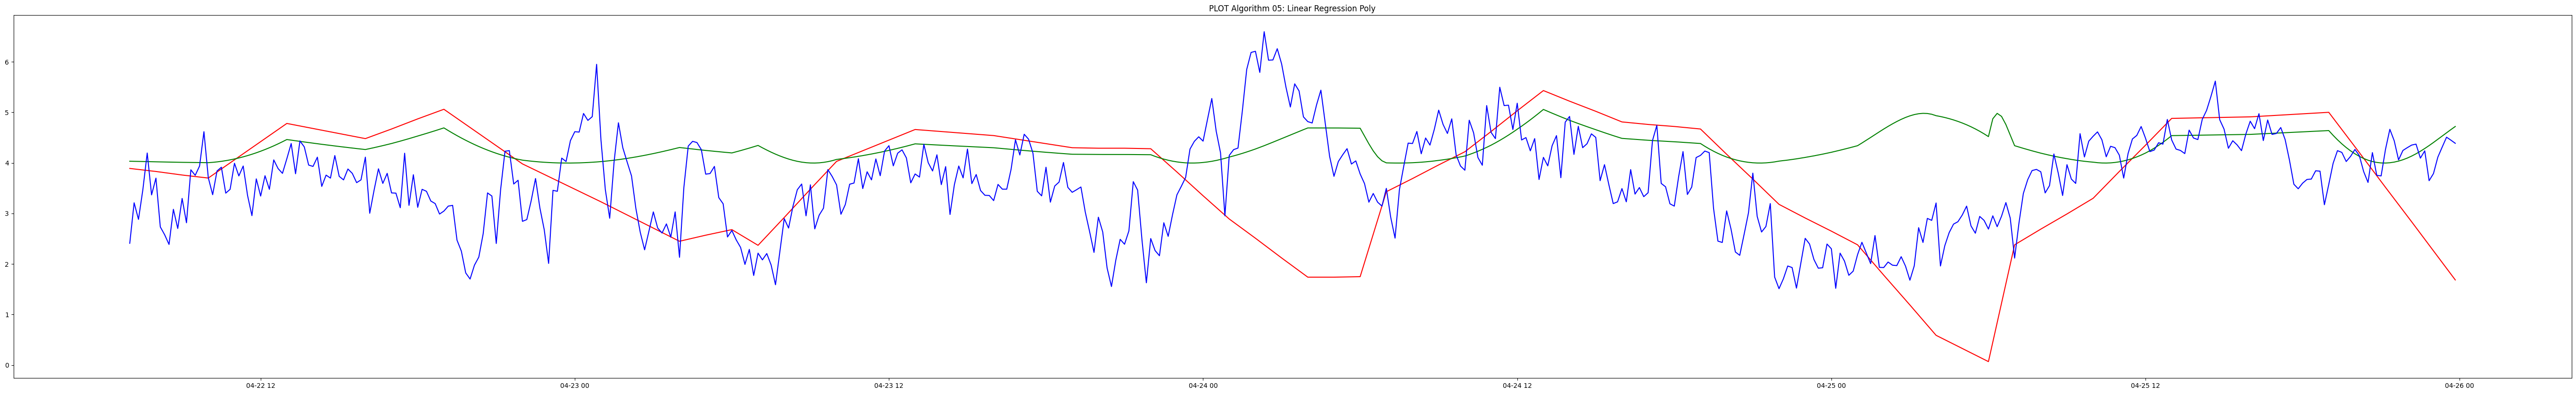

In [ ]:
print("===== [TEST SET] PLOT Algorithm 05: Linear Regression Poly \n")

plt.figure(1, figsize=(70, 10))
plt.plot(test_glass_wind_df["time"], test_glass_wind_df[GLASS_MODEL]-CONSTANT, "r")
plt.plot(test_glass_wind_df["time"], y_test_predict_lr_poly, "g") 

plt.plot(test_real_wind_df["PCTimeStamp"], test_real_wind_df[CHOOSED_TUABIN], "b")
plt.title("PLOT Algorithm 05: Linear Regression Poly")
plt.show()

### Algorithm 07: Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting_reg = GradientBoostingRegressor(max_depth=5, n_estimators=30, learning_rate=0.5, random_state=42)
gradient_boosting_reg.fit(X_train, y_train_real)

y_test_predict_gradient = gradient_boosting_reg.predict(X_test)


In [ ]:
print("===== [TEST SET] Algorithm 06: Random Forest \n")

windspeed_mape_error = mape_error(y_test_real, y_test_predict_gradient)
print("[TEST] MAPE ERROR = ", windspeed_mape_error)

===== [TEST SET] Algorithm 06: Random Forest 

[TEST] MAPE ERROR =  32.704875488058086


===== [TEST SET] PLOT Algorithm 05: Linear Regression Poly 



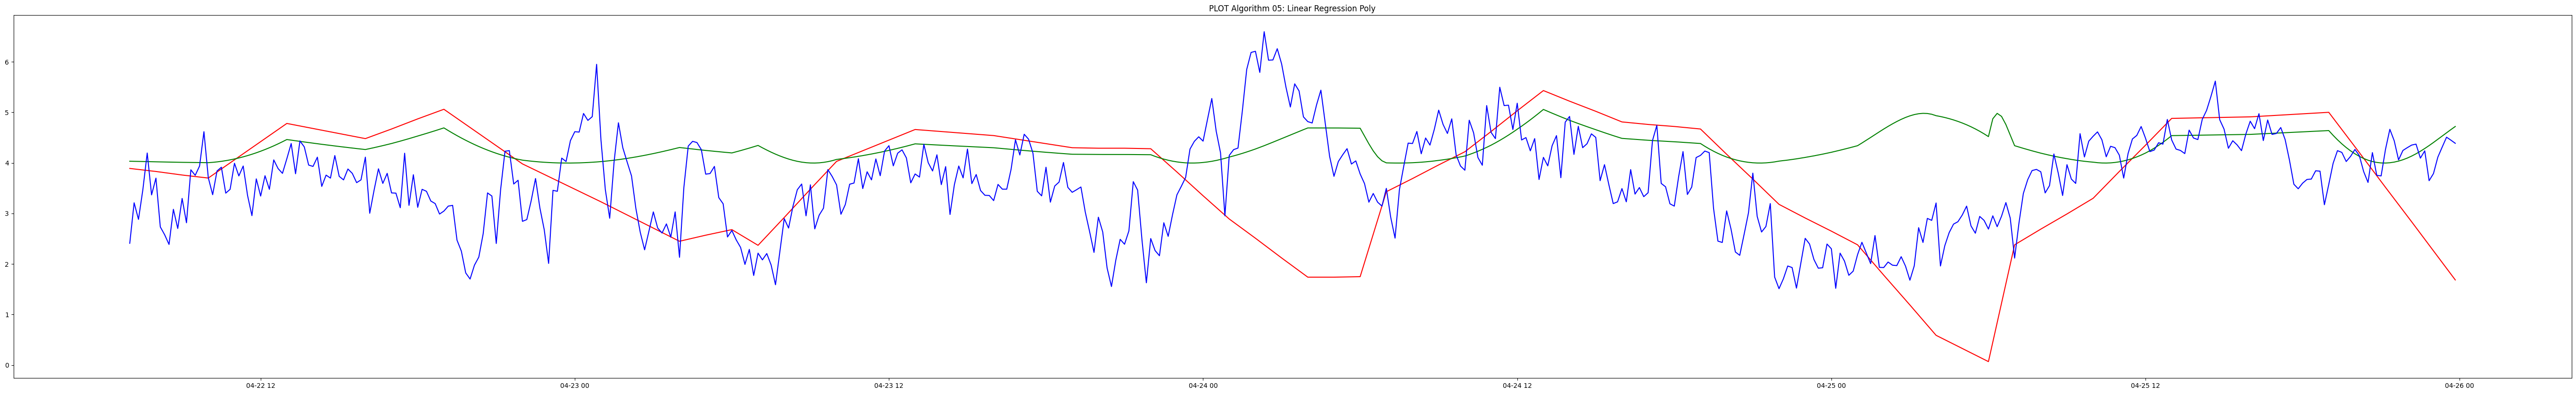

In [ ]:
print("===== [TEST SET] PLOT Algorithm 05: Linear Regression Poly \n")

plt.figure(1, figsize=(70, 10))
plt.plot(test_glass_wind_df["time"], test_glass_wind_df[GLASS_MODEL]-CONSTANT, "r")
plt.plot(test_glass_wind_df["time"], y_test_predict_lr_poly, "g") 

plt.plot(test_real_wind_df["PCTimeStamp"], test_real_wind_df[CHOOSED_TUABIN], "b")
plt.title("PLOT Algorithm 05: Linear Regression Poly")
plt.show()